<a href="https://www.kaggle.com/code/omarreess/mnist-images-classification-cnn?scriptVersionId=110740711" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Mnist Images Classificaton Task with ConvNets CNN Model**


In [1]:
## Get Data 
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [2]:
# Checking Data Shape 
train_images.shape

(60000, 28, 28)

In [3]:

import numpy as np
# Make Padding for Images matrix
train_images = np.pad(train_images, ((0,0),(2,2),(2, 2)), 'constant') 
test_images = np.pad(test_images, ((0,0),(2,2),(2, 2)), 'constant')



In [4]:
# Reshaping Data , give it 1 img chanel 
from tensorflow.keras.utils import to_categorical
train_images = train_images[:, :, :, np.newaxis]
test_images = test_images[:, :, :, np.newaxis]



In [5]:
#Encode Label output
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# **CNN Model Arch**

In [6]:
# Model Layers
from tensorflow.keras import models, layers
from tensorflow.keras import Model, Input ,regularizers

model = models.Sequential()

model.add(layers.Conv2D(filters=10, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(layers.Conv2D(64, kernel_size=(4, 4), activation='relu'
 , kernel_regularizer=regularizers.l2(0.01)))

model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=10, activation = 'softmax'))



## 
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Model Learning 
model.fit(train_images, train_labels, epochs=5, batch_size=128)


# Getting Model's Accuracy for Test data 
test_loss, test_acc = model.evaluate(test_images, test_labels)

2022-11-12 00:13:09.433527: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-11-12 00:13:09.788989: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
469/469 [==============================] - 14s 27ms/step - loss: 0.6913 - accuracy: 0.8947
Epoch 2/5
469/469 [==============================] - 12s 26ms/step - loss: 0.2330 - accuracy: 0.9737
Epoch 3/5
469/469 [==============================] - 12s 26ms/step - loss: 0.1600 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 13s 27ms/step - loss: 0.1170 - accuracy: 0.9839
Epoch 5/5
313/313 [==============================] - 2s 4ms/step - loss: 0.0763 - accuracy: 0.9890


# **Visualizing Convnets**

**Visualizing convnets output**

In [7]:
# handle img shape
img_tensor=train_images[0].reshape(1,32,32,1)
img_tensor.shape


(1, 32, 32, 1)

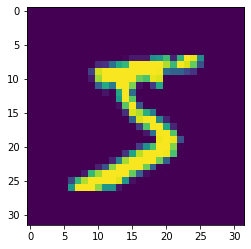

In [8]:
# show target img
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()
 

In [9]:
# Get Layers Output

from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers[:4]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 28, 28, 10)


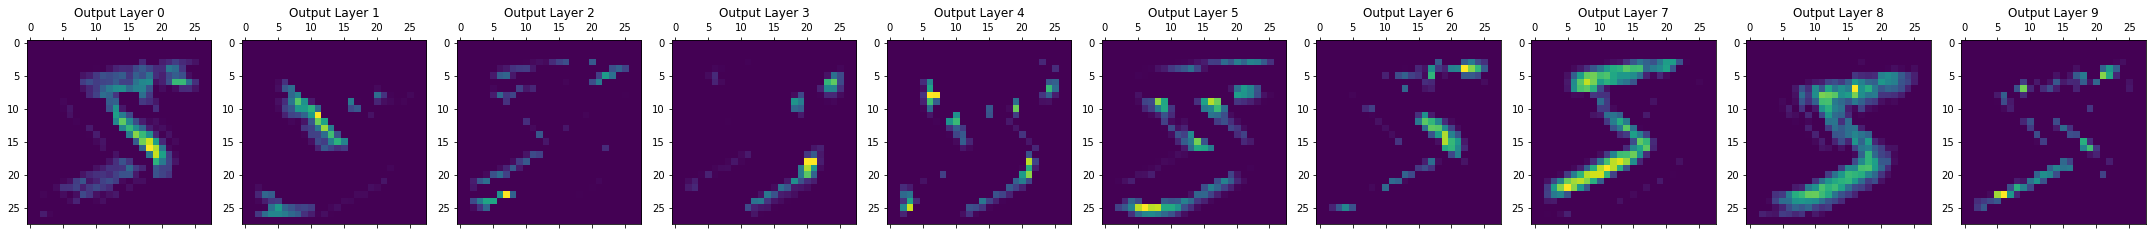

In [10]:
#Show Output Feature Maps

layers_num=first_layer_activation.shape[3]
fig, axes = plt.subplots(1,layers_num, figsize = (30,5))
for i in range(layers_num) : 
    axes[i].matshow(first_layer_activation[0, :, :, i], cmap='viridis')
    axes[i].set_title(f'Output Layer {i}')

    
fig.tight_layout()
plt.show()

    
 